# Experiments

## Some Downsampling stuff

(256, 256)


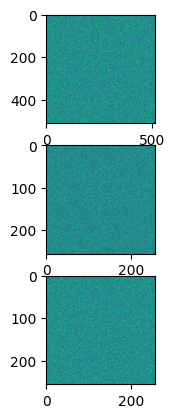

In [2]:
import numpy as np
from scipy import signal
from scipy.ndimage import zoom
import pywt
import matplotlib.pyplot as plt

def average_pooling(data, factor):
    """Downsample using average pooling"""
    h, w = data.shape
    return data.reshape(h//factor, factor, w//factor, factor).mean(axis=(1,3))

def fourier_downsample(data, target_size):
    """Downsample in Fourier space to preserve frequency information"""
    # Compute 2D FFT
    f_transform = np.fft.fft2(data)
    f_shift = np.fft.fftshift(f_transform)
    
    # Calculate center and target size
    center_y, center_x = [dim//2 for dim in f_shift.shape]
    target_y, target_x = target_size
    half_y, half_x = target_y//2, target_x//2
    
    # Crop frequency spectrum
    f_crop = f_shift[center_y-half_y:center_y+half_y, 
                     center_x-half_x:center_x+half_x]
    
    # Inverse FFT
    i_shift = np.fft.ifftshift(f_crop)
    downsampled = np.fft.ifft2(i_shift)
    
    return np.abs(downsampled)

og = np.random.rand(512,512)
f = fourier_downsample(og, (256,256))
m = average_pooling(og, 2)
print(f.shape)
plt.subplot(3,1,1)
plt.imshow(og)
plt.subplot(3,1,2)
plt.imshow(f)
plt.subplot(3,1,3)
plt.imshow(m)

## Vectorize our preprocessing

In [3]:
import numpy as np
from numpy.lib.stride_tricks import as_strided

def sliding_window(arr, window_size):
    stride_0, stride_1, stride_2, stride_3 = arr.strides
    return as_strided(arr, shape=(arr.shape[0] // window_size, window_size, *arr.shape[1:]),
                      strides=(stride_0 * window_size, stride_0, stride_1, stride_2, stride_3))

# Example array
x, y, z = 1000, 512, 512
data = np.random.rand(x, 3, y, z)

# Define window (chunk) size
chunk_size = 100

# Get chunks without explicit looping
chunks = sliding_window(data, chunk_size)

# Now apply a function to all chunks at once using a vectorized operation
result = np.sum(chunks, axis=2)  # Sum across each chunk
print(result.shape)  # This will have shape (10, 3, 512, 512)

(10, 100, 512, 512)
